<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Data_Immersion_by_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Dataset

In [79]:
data = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression='zip')
data.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [80]:
data.tratamento.value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [81]:
data.dose.value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [82]:
data.droga.value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
32dccc366       1
f19d8c43b       1
c0521523c       1
67c4672f3       1
dd4a96d16       1
Name: droga, Length: 3289, dtype: int64

In [83]:
data.tempo.value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [84]:
data['g-0'].value_counts()

 0.0000     22
-0.3372     15
 10.0000    14
-1.0040     10
-1.0860      9
            ..
 0.3486      1
 5.5050      1
 3.3790      1
 0.6153      1
-0.8598      1
Name: g-0, Length: 14367, dtype: int64

# Checking, Why 'tratamento' Variable is umbalanced?

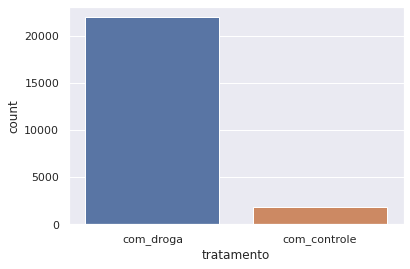

In [85]:
sns.countplot(data=data, x='tratamento');

In [86]:
# checking proportion between values
round(data['tratamento'].value_counts('com_droga')*100,2)

com_droga       92.16
com_controle     7.84
Name: tratamento, dtype: float64

In [87]:
quant_drogs = data['droga'].unique()
print(f"Number of experiments: {data.shape[0]}, Number of drogs used: {len(quant_drogs)}")

Number of experiments: 23814, Number of drogs used: 3289


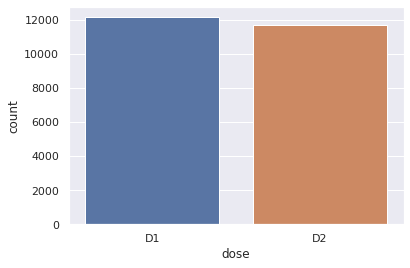

In [88]:
sns.countplot(data=data, x='dose');

In [89]:
# checking proportion between values
round(data['dose'].value_counts('d1')*100,2)

D1    51.01
D2    48.99
Name: dose, dtype: float64

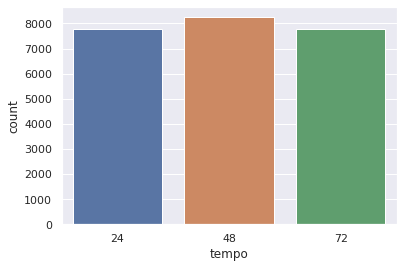

In [90]:
# checking proportion between values
sns.countplot(x='tempo', data=data);

# Data Visualization

In [91]:
# rename column
data.rename(columns={'droga':'small_molecule'}, inplace=True)

In [92]:
data.head()

,id,tratamento,tempo,dose,small_molecule,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


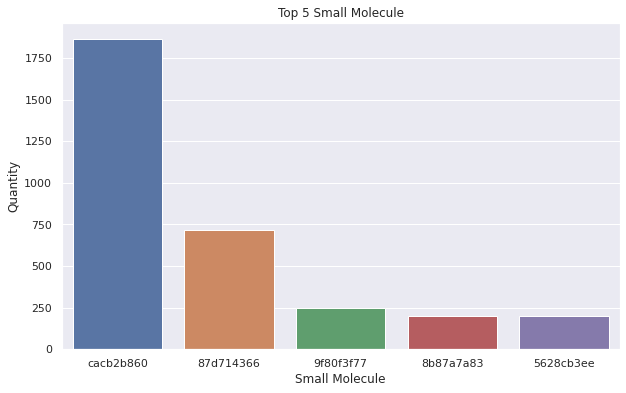

In [93]:
sm_mol = data.small_molecule.value_counts().index[0:5]
sns.set()
plt.figure(figsize=(10,6))
ax = sns.countplot(x='small_molecule', data=data.query('small_molecule in @sm_mol'),order=sm_mol)
ax.set_title('Top 5 Small Molecule')
ax.set_xlabel('Small Molecule')
ax.set_ylabel('Quantity');

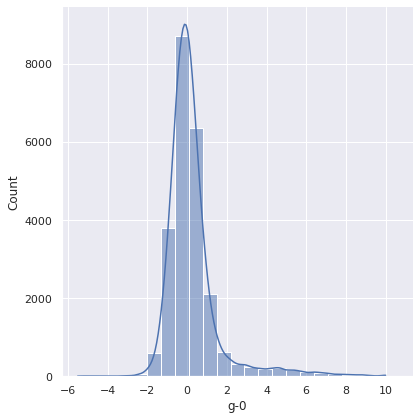

In [94]:
ax = sns.displot(data, x="g-0", bins=50, height=6, binwidth=0.7, kde=True);

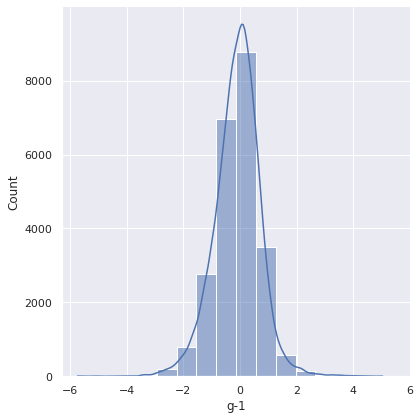

In [95]:
ax = sns.displot(data, x="g-1", bins=50, height=6, binwidth=0.7, kde=True);

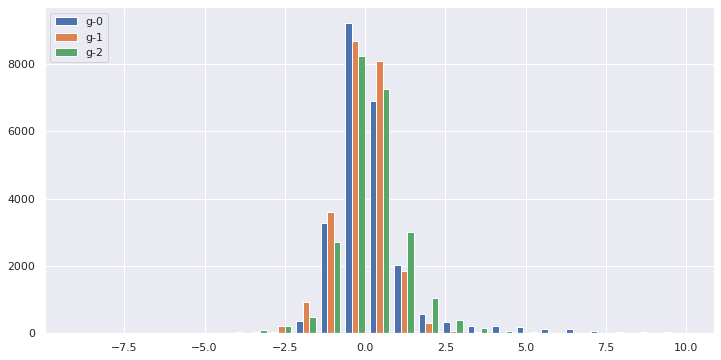

In [96]:
g_0 = data['g-0']
g_1 = data['g-1']
g_2 = data['g-2']
plt.figure(figsize=(12,6))
plt.hist([g_0, g_1, g_2], bins=25, label=['g-0', 'g-1', 'g-2'])
plt.legend(loc='upper left');

In [97]:
data_stat = data.describe().T
data_stat

,count,mean,std,min,25%,50%,75%,max
tempo,23814.0,48.020156,19.402807,24.000,24.000000,48.00000,72.000000,72.000
g-0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
...,...,...,...,...,...,...,...,...
c-95,23814.0,-0.353726,1.629291,-10.000,-0.567975,-0.01025,0.444750,2.814
c-96,23814.0,-0.463485,2.059725,-10.000,-0.552575,-0.00125,0.465225,3.505
c-97,23814.0,-0.378241,1.703615,-10.000,-0.561000,-0.00680,0.446400,2.924
c-98,23814.0,-0.470252,1.834828,-10.000,-0.592600,0.01400,0.461275,3.111


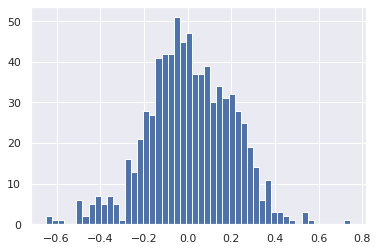

In [98]:
data.loc[:, 'g-0':'g-771'].describe().T['mean'].hist(bins=50)

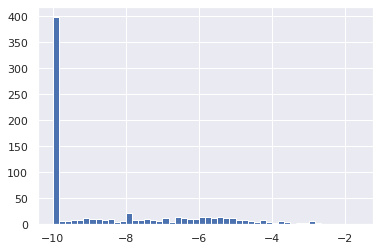

In [99]:
data.loc[:, 'g-0':'g-771'].describe().T['min'].hist(bins=50)

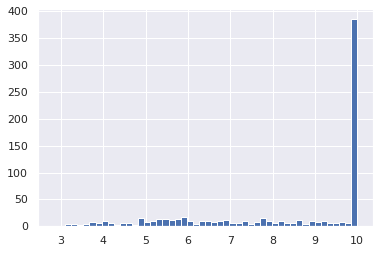

In [100]:
data.loc[:, 'g-0':'g-771'].describe().T['max'].hist(bins=50)

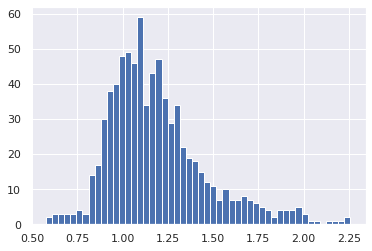

In [101]:
data.loc[:, 'g-0':'g-771'].describe().T['std'].hist(bins=50)

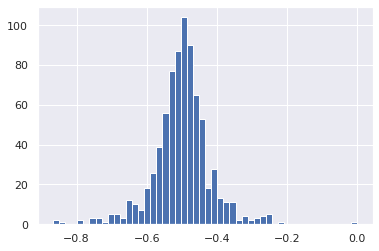

In [102]:
data.loc[:, 'g-0':'g-771'].describe().T['25%'].hist(bins=50)

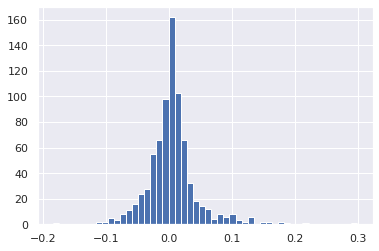

In [103]:
data.loc[:, 'g-0':'g-771'].describe().T['50%'].hist(bins=50)

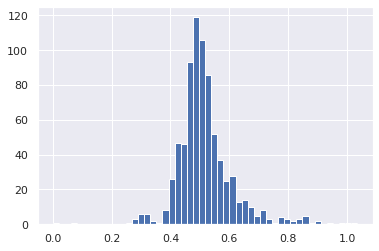

In [104]:
data.loc[:, 'g-0':'g-771'].describe().T['75%'].hist(bins=50)

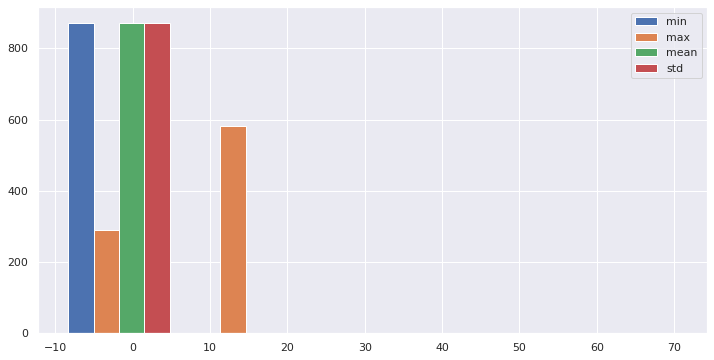

In [105]:
data_min = data_stat['min']
data_max = data_stat['max']
data_mean = data_stat['mean']
data_std = data_stat['std']
plt.figure(figsize=(12,6))
plt.hist([data_min, data_max, data_mean, data_std], bins=5, label=['min', 'max', 'mean', 'std'])
plt.legend(loc='upper right');

#Correlation, Casuality and Relation

In [106]:
data.head()

,id,tratamento,tempo,dose,small_molecule,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [107]:
pd.crosstab(data.dose, data.tempo)

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [108]:
pd.crosstab(data.dose, data.tratamento)

tratamento,com_controle,com_droga
dose,,
D1,951,11196
D2,915,10752


In [109]:
pd.crosstab(data.tratamento, data.tempo)

tempo,24,48,72
tratamento,,,
com_controle,606,648,612
com_droga,7166,7602,7180


In [110]:
round(pd.crosstab([data.dose, data.tempo], data.tratamento, normalize='index')*100,4)

tratamento  com_controle  com_droga
dose tempo                         
D1   24           7.7458    92.2542
     48           7.8778    92.1222
     72           7.8577    92.1423
D2   24           7.8487    92.1513
     48           7.8285    92.1715
     72           7.8507    92.1493

In [111]:
pd.crosstab([data.dose, data.tempo], data.tratamento, values=data['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [112]:
pd.crosstab([data.dose, data.tempo], data.tratamento, values=data['g-0'], aggfunc='var')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.564594   2.137311
     48         0.728284   2.869308
     72         0.591814   2.127514
D2   24         0.699943   1.092022
     48         0.700310   1.730477
     72         0.770956   2.106944

In [113]:
pd.crosstab([data.dose, data.tempo], data.tratamento, values=data['g-0'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

In [114]:
com_droga = data[data['tratamento']=='com_droga'].groupby(['dose','tempo']).count()['tratamento']
#Agrupa os dados por dose e por tempo e faz a contagem para os dados com_droga
com_controle = data[data['tratamento']=='com_controle'].groupby(['dose','tempo']).count()['tratamento']
#Agrupa os dados por dose e por tempo e faz a contagem para os dados com_controle
com_droga

dose  tempo
D1    24       3585
      48       4011
      72       3600
D2    24       3581
      48       3591
      72       3580
Name: tratamento, dtype: int64

In [115]:
com_controle

dose  tempo
D1    24       301
      48       343
      72       307
D2    24       305
      48       305
      72       305
Name: tratamento, dtype: int64

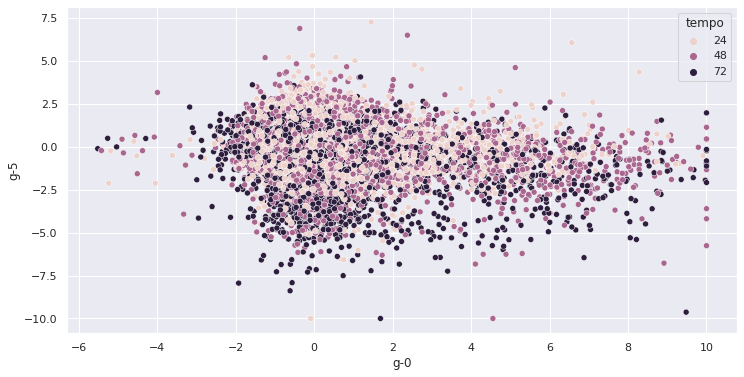

In [116]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='g-0', y='g-5', hue='tempo', data=data);

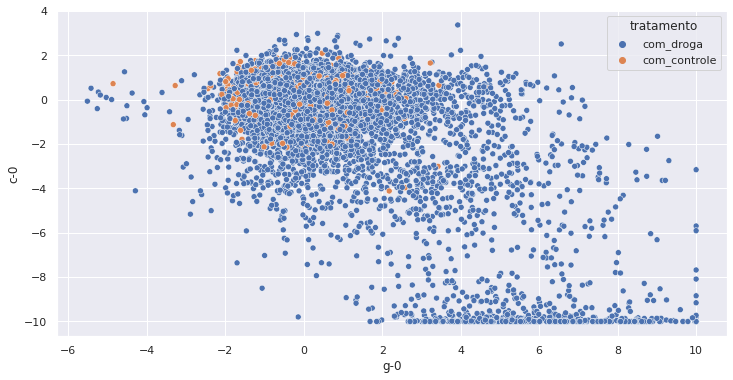

In [117]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='g-0', y='c-0', hue='tratamento', data=data);

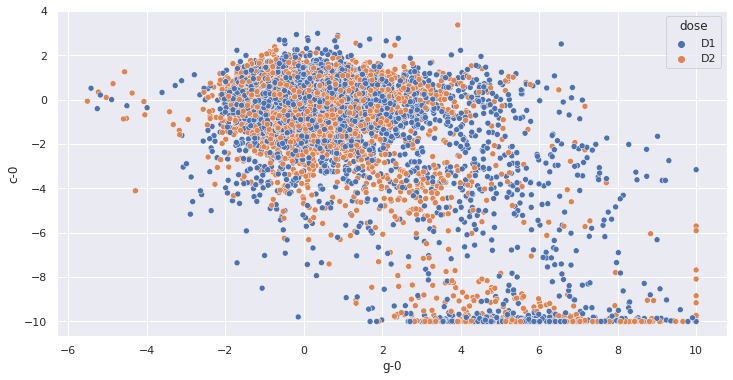

In [118]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='g-0', y='c-0', hue='dose', data=data);

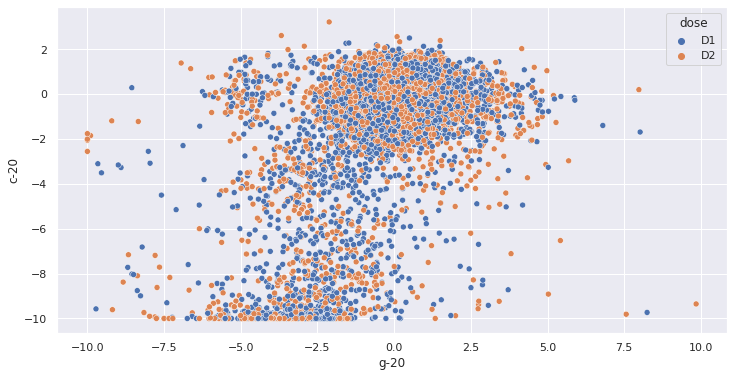

In [119]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='g-20', y='c-20', hue='dose', data=data);

<Figure size 864x432 with 0 Axes>

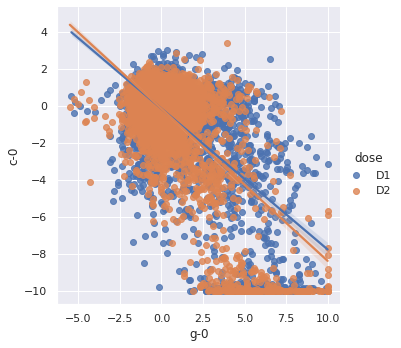

In [120]:
plt.figure(figsize=(12,6))
sns.lmplot(x='g-0', y='c-0', hue='dose', data=data);

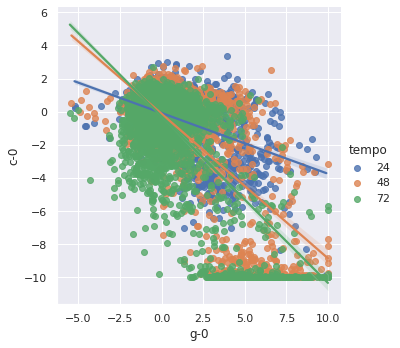

In [121]:
sns.lmplot(x='g-0', y='c-0', hue='tempo', data=data);

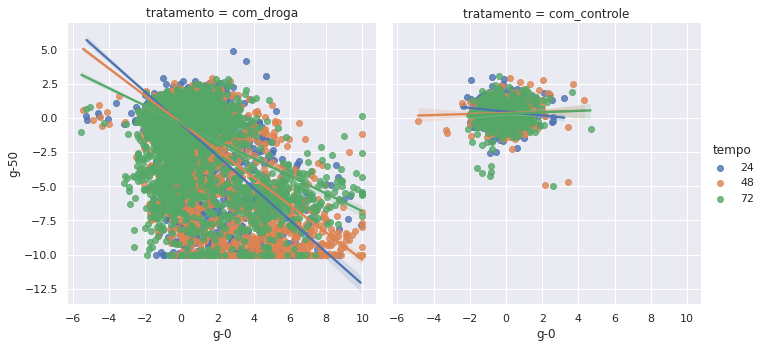

In [122]:
sns.lmplot(x='g-0', y='g-50', hue='tempo', col='tratamento', data=data);

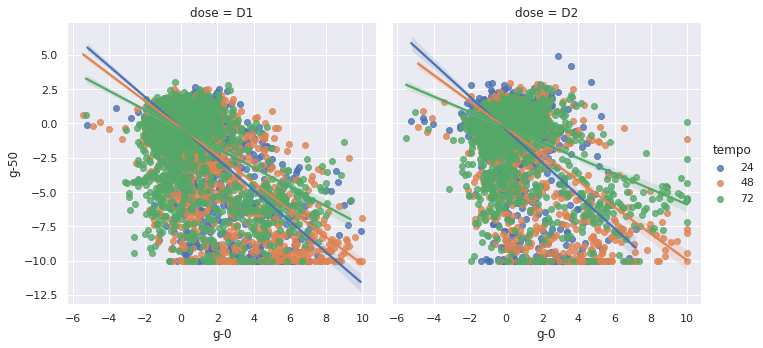

In [123]:
sns.lmplot(x='g-0', y='g-50', hue='tempo', col='dose', data=data);

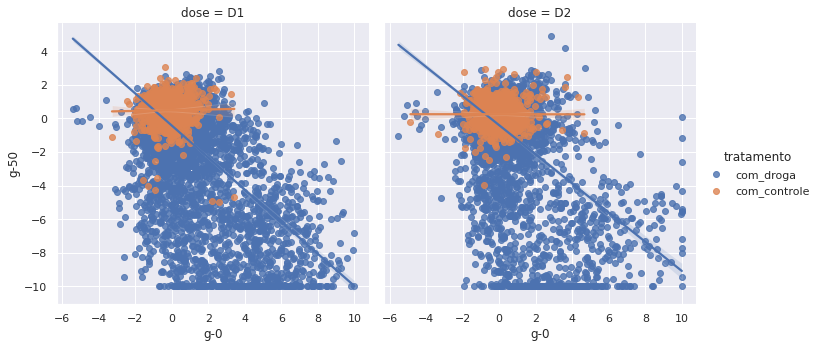

In [124]:
sns.lmplot(x='g-0', y='g-50', hue='tratamento', col='dose', data=data);

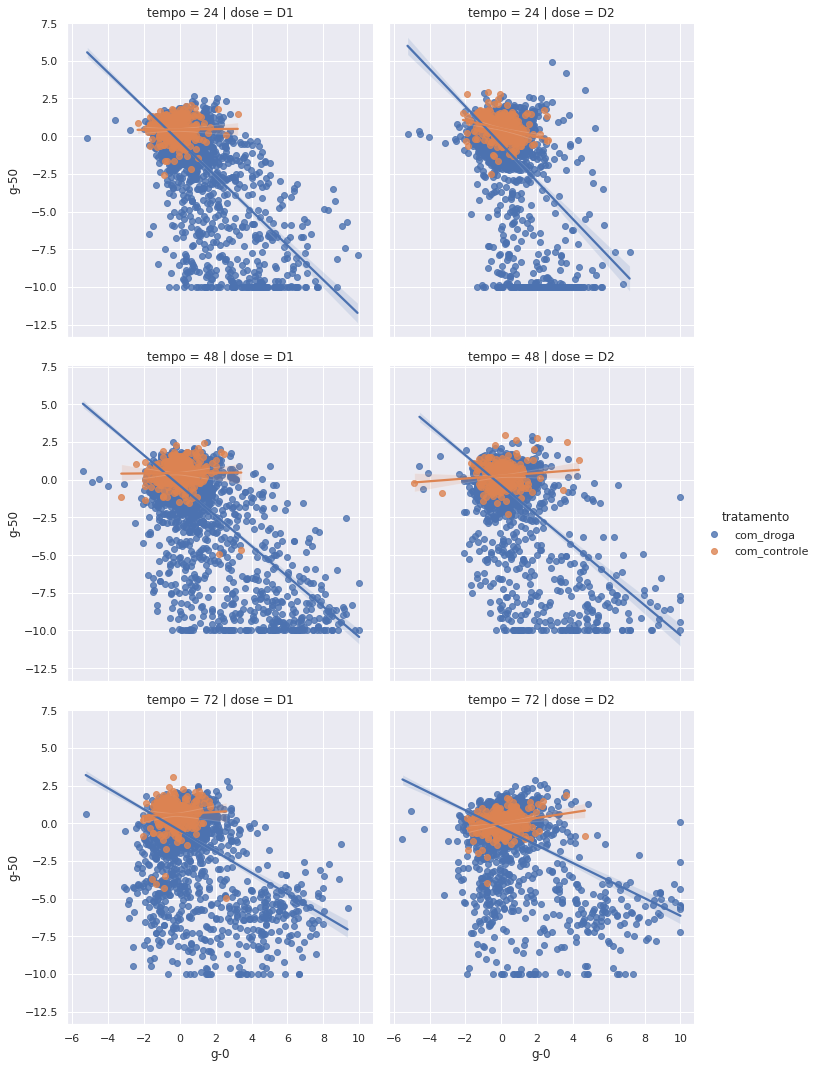

In [125]:
sns.lmplot(x='g-0', y='g-50', hue='tratamento', col='dose', row='tempo', data=data);

### Correlation

In [126]:
data.loc[:, 'g-0':'g-10'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021
g-5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,0.038743
g-6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,-0.264575
g-7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,0.382325
g-8,-0.604212,-0.009973,-0.128029,-0.086167,-0.474828,0.073885,-0.212292,0.278085,1.000000,0.330284,0.556854
g-9,-0.428779,-0.047558,-0.081332,-0.014052,-0.274167,0.126561,-0.134739,0.288780,0.330284,1.000000,0.423656


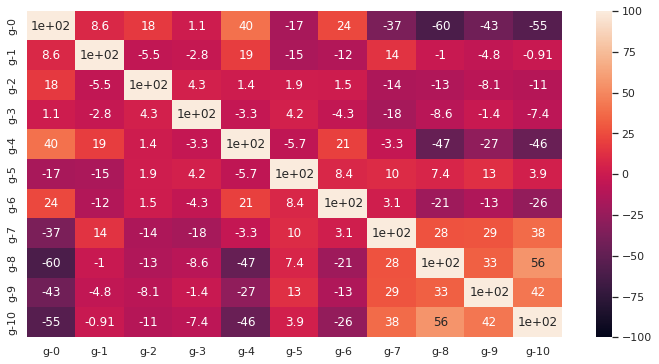

In [127]:
sns.set()
plt.figure(figsize=(12,6))
ax = sns.heatmap(data.loc[:, 'g-0':'g-10'].corr()*100, annot=True, vmax=100., vmin=-100.)

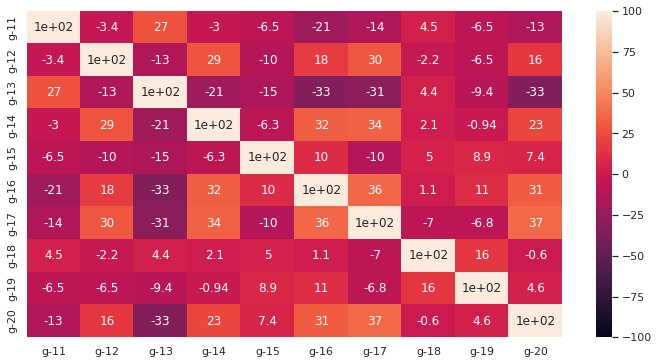

In [128]:
sns.set()
plt.figure(figsize=(12,6))
ax = sns.heatmap(data.loc[:, 'g-11':'g-20'].corr()*100, annot=True, vmax=100., vmin=-100.)

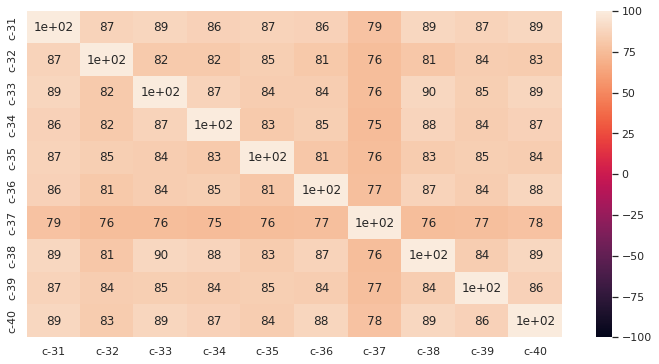

In [129]:
sns.set()
plt.figure(figsize=(12,6))
ax = sns.heatmap(data.loc[:, 'c-31':'c-40'].corr()*100, annot=True, vmax=100., vmin=-100.)

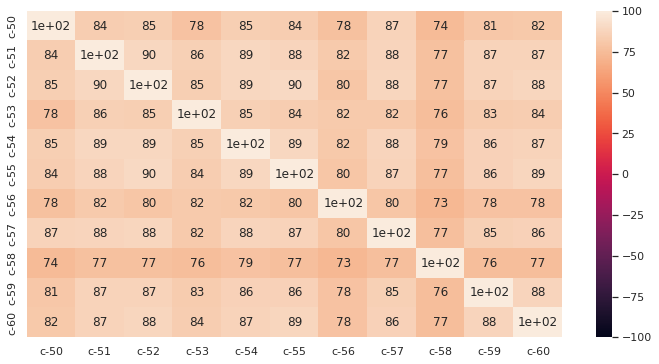

In [130]:
sns.set()
plt.figure(figsize=(12,6))
ax = sns.heatmap(data.loc[:, 'c-50':'c-60'].corr()*100, annot=True, vmax=100., vmin=-100.)

###Data Merge and Results Analysis

In [131]:
result_data = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
result_data.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
result_data.shape

(23814, 207)

In [133]:
result_data.acat_inhibitor.value_counts()

0    23790
1       24
Name: acat_inhibitor, dtype: int64

In [134]:
result_data.acetylcholine_receptor_agonist.value_counts()

0    23624
1      190
Name: acetylcholine_receptor_agonist, dtype: int64

In [135]:
moa_counts = result_data.select_dtypes('int64').sum().sort_values(ascending=False)
moa_counts[0:10]

nfkb_inhibitor                    832
proteasome_inhibitor              726
cyclooxygenase_inhibitor          435
dopamine_receptor_antagonist      424
serotonin_receptor_antagonist     404
dna_inhibitor                     402
glutamate_receptor_antagonist     367
adrenergic_receptor_antagonist    360
cdk_inhibitor                     340
egfr_inhibitor                    336
dtype: int64

In [136]:
result_data['n_moa'] = result_data.select_dtypes('int64').sum(axis=1)
result_data.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [137]:
result_data['moa_active'] = (result_data['n_moa'] != 0)
result_data.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,moa_active
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [138]:
merge_data = pd.merge(data, result_data[['id', 'n_moa', 'moa_active']], on='id')
merge_data.head()

,id,tratamento,tempo,dose,small_molecule,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,moa_active
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [139]:
merge_data.query("tratamento == 'com_controle'"  )['moa_active'].value_counts()

False    1866
Name: moa_active, dtype: int64

In [140]:
merge_data['is_control'] = merge_data.query("tratamento != 'com_controle'"  )['moa_active']

In [141]:
merge_data.head()

,id,tratamento,tempo,dose,small_molecule,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,moa_active,is_control
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,True


In [142]:
merge_data = pd.get_dummies(merge_data, columns=['tratamento','dose' ,'tempo'])
merge_data.head()

,id,small_molecule,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,...,n_moa,moa_active,is_control,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,...,1,True,True,0,1,1,0,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,...,0,False,False,0,1,1,0,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,...,3,True,True,0,1,1,0,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,...,0,False,False,0,1,1,0,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,...,1,True,True,0,1,0,1,0,0,1


### Machine Learning

#####Logistic Regression

In [143]:
X = merge_data.select_dtypes('float64')
y = merge_data['moa_active']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
lr = LogisticRegression(max_iter=2000).fit(X_train,y_train)
lr.score(X_test, y_test)

0.6353138778081041

In [144]:
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
y_pred = dummy.predict(X_test)
accuracy_score(y_test, y_pred)

0.6067604450976275

#####Decision Tree

In [145]:
X = merge_data.select_dtypes('float64')
y = merge_data['moa_active']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
tree_model = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6141087549863531

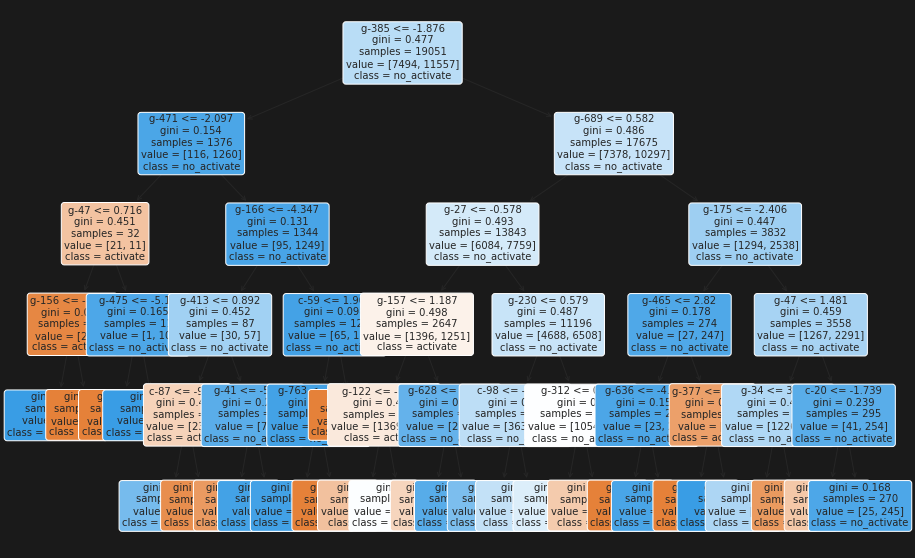

In [146]:
f, ax = plt.subplots(figsize=(15,10), facecolor='k')
tree.plot_tree(tree_model, ax=ax, fontsize=10, rounded=True, filled=True, 
               feature_names=X_train.columns, class_names=['activate', 'no_activate'])
plt.show()

In [147]:
test = []
train = []
for i in range(1,15):
    tree_model = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    test.append(tree_model.score(X_test, y_test))
    train.append(tree_model.score(X_train, y_train))

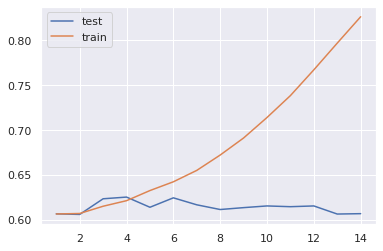

In [148]:
sns.lineplot(x=range(1,15), y=test, label=('test'))
sns.lineplot(x=range(1,15), y=train, label=('train'))

In [149]:
test_random = []
train_random = []
for i in range(100,500,100):
    random = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    test_random.append(random.score(X_test, y_test))
    train_random.append(random.score(X_train, y_train))

In [150]:
max(test_random), max(train_random)

(0.5832458534537056, 1.0)

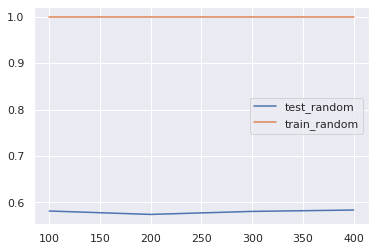

In [151]:
sns.lineplot(x=range(100,500,100), y=test_random, label=('test_random'))
sns.lineplot(x=range(100,500,100), y=train_random, label=('train_random'))

In [152]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19051, 872), (4763, 872), (19051,), (4763,))

In [153]:
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X, y)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, stratify=y_smt, random_state = 42)

In [155]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23115, 872), (5779, 872), (23115,), (5779,))

In [157]:
random2 = RandomForestClassifier(max_depth=100).fit(X_train, y_train)
y_pred_r = random2.predict(X_test)
accuracy_score(y_test, y_pred_r)

0.7080809828690084